# COMP 6981 - Program

## Bangladeshi paddy trend analysis in coastal areas

------------------------------------------------------------------------------------------

**Name:** Fatema Yeasmin Chowdhury

**Student #:** 202193356

**email:** fychowdhury@mun.ca

------------------------------------------------------------------------------------------

**Name:** Qian Zhong

**Student #:** 202190644

**email:** qzhong@mun.ca

# Part 1 - Dataset Presentation

We have worked on Bangladeshi paddy trend analysis in coastal areas. The main purpose of this project is to analyze the influence of the weather conditions on paddy sowing time. 

For that, we have collected feature data on the weather of Bangladesh from Nasa Power View and label data from the Yearbook of Bangladesh Agriculture Statistics 2020 book.

In this real dataset, we have total 6 attributes (5 independent data - temperature, humidity, wind speed, precipitation and moisture, and one target value which is crops - aus, aman, and boro) and 1827 instances. Index is Date.

In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from datetime import datetime

In [459]:
#read Dataset
df = pd.read_csv('CropsFinal_V1.csv',index_col=0)

def timefunc(a):
    a=a.strip('UTC').strip()
    a=datetime.strptime(a,"%m/%d/%Y")
    a=a.strftime('%Y-%m-%d')
    return a

#change index to readable date
df.index =pd.Series(df.index).apply(timefunc)

df

,Precipitation,Temperature,Wind,Humidity,Crops,Moisture
Date,,,,,,
2016-01-01,1.1,19.79,NaN,62.720000,Boro,0.62
2016-01-02,1.5,19.82,1.43,62.410000,Boro,0.62
2016-01-03,0.0,19.79,1.14,124.896779,Boro,0.62
2016-01-04,1.6,19.80,1.20,59.850000,Boro,0.61
2016-01-05,0.0,19.79,1.10,57.250000,Boro,0.61
...,...,...,...,...,...,...
2020-12-27,0.0,16.86,2.06,73.270000,Boro,0.77
2020-12-28,0.0,17.14,1.84,71.910000,Boro,0.76
2020-12-29,0.0,17.24,2.02,73.050000,Boro,0.76


The input features of our dataset are Precipitation, Temperature, Wind, Humidity, and Moisture and the target value of our dataset is Crops. From the table above, we can see our dataset.

In [460]:
from IPython.display import display

plt.rcParams["figure.dpi"] = 326

print("Dataset Description Display")
display(df.describe())

Dataset Description Display


,Precipitation,Temperature,Wind,Humidity,Moisture
count,1642.000000,1827.000000,1641.000000,1827.000000,1827.000000
mean,10.773866,25.708071,2.236976,79.091142,0.787219
std,14.030122,4.383733,0.998802,12.809595,0.183842
min,0.000000,10.768576,0.321019,32.259415,0.430000
25%,0.070000,23.015000,1.500000,71.570000,0.620000
50%,4.300000,27.660000,2.010000,82.040000,0.840000
75%,16.822500,28.560000,2.770000,88.280000,0.960000
max,80.000000,40.934096,9.420000,128.440668,1.000000


In the precipitation feature, we have 0 which is the lowest value and 80 which is the highest value. For temperature feature we have minimum 10.77 value and maximum 40.93. in the wind feature, we have 0.32 minimum value and 9.42 maximum value. For humidity, we have 32.26 minimum value and 128.44 maximum value. And for Moisture, we have 0.43 minimum value and maximum 1.00.

The data type of temperature, humidity, wind speed, precipitation and moisture are float and the data type of crops is object.

The mean value for temperature, humidity, wind speed, precipitation and moisture are 10.21, 25.71, 2.22, 79.09 and 0.79 respectively. 

The standard deviation value for temperature, humidity, wind speed, precipitation and moisture are 12.80, 4.38, 0.95, 12.81 and 0.18 respectively. 

In [461]:
print("Dataset Information Display")
display(df.info())

Dataset Information Display
<class 'pandas.core.frame.DataFrame'>
Index: 1827 entries, 2016-01-01 to 2020-12-31
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Precipitation  1642 non-null   float64
 1   Temperature    1827 non-null   float64
 2   Wind           1641 non-null   float64
 3   Humidity       1827 non-null   float64
 4   Crops          1827 non-null   object 
 5   Moisture       1827 non-null   float64
dtypes: float64(5), object(1)
memory usage: 99.9+ KB


None

From above information, we know that Column Precipitation and Wind exist missing data

Dataset Plots Display


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

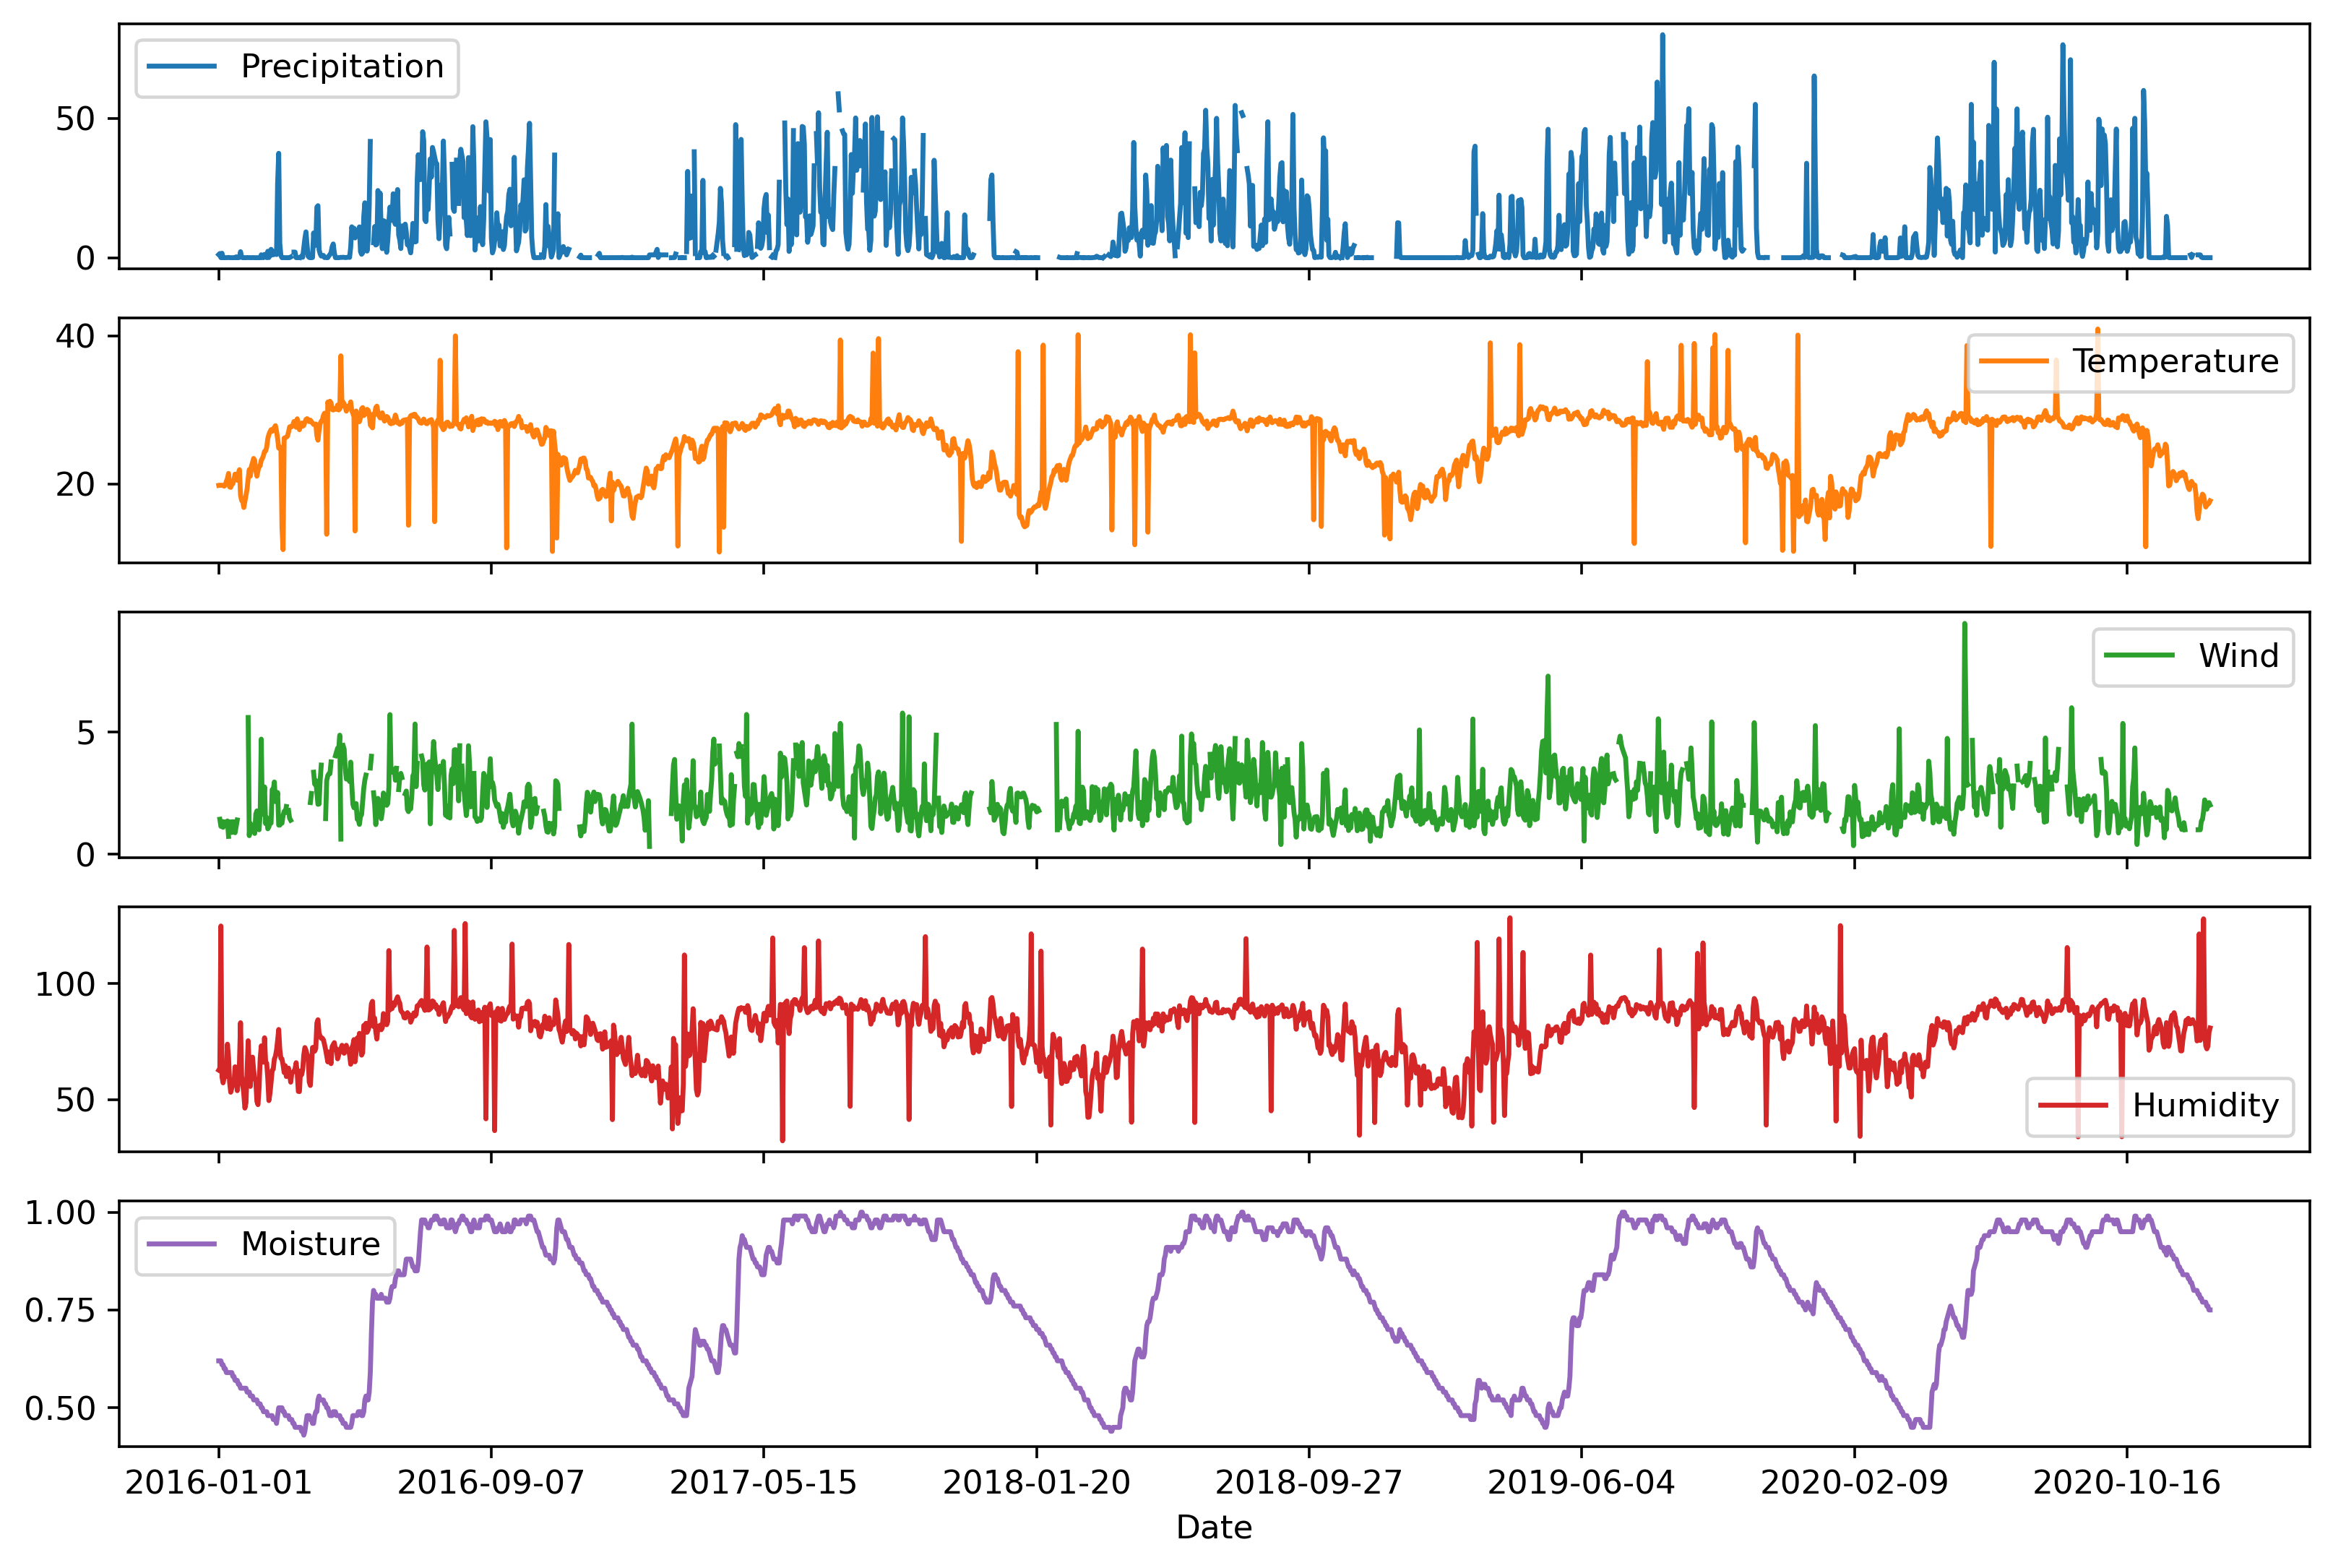

In [462]:
print("Dataset Plots Display")
display(df[['Precipitation', 'Temperature', 'Wind', 'Humidity', 'Moisture']].plot(
    subplots=True,
    figsize=(12,8)))

From the plot above, we can see the data distribution of our real dataset. 

From the plot above, we can see that there's some missing values in Precipitation and Wind features. We have to handle these missing data. From temperature, humidity, wind speed, precipitation and moisture plot we can see that in the line chart above the data points of the features is abruptly changing which means we have some outliers in our dataset. We have to handle these outliers as well. 

In [463]:
# Change target from string to number
replace_dict= {'Boro':0,'Aus':1,'Aman':2}
print(replace_dict)

{'Boro': 0, 'Aus': 1, 'Aman': 2}


Then we converted the crops attribute into a continuous attribute (e.g., 0 - boro, 1 - aus, 2 - aman). This attribute is our target variable.

In [464]:
df['Crops']=df['Crops'].map(replace_dict)
df

,Precipitation,Temperature,Wind,Humidity,Crops,Moisture
Date,,,,,,
2016-01-01,1.1,19.79,NaN,62.720000,0,0.62
2016-01-02,1.5,19.82,1.43,62.410000,0,0.62
2016-01-03,0.0,19.79,1.14,124.896779,0,0.62
2016-01-04,1.6,19.80,1.20,59.850000,0,0.61
2016-01-05,0.0,19.79,1.10,57.250000,0,0.61
...,...,...,...,...,...,...
2020-12-27,0.0,16.86,2.06,73.270000,0,0.77
2020-12-28,0.0,17.14,1.84,71.910000,0,0.76
2020-12-29,0.0,17.24,2.02,73.050000,0,0.76


<AxesSubplot:>

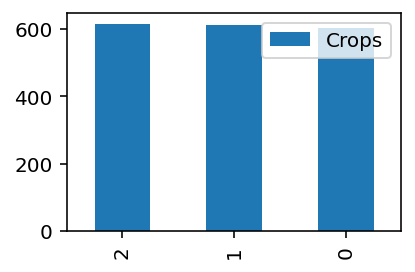

In [465]:
plt.rcParams["figure.dpi"] = 144

bardf = pd.DataFrame({
    'Crops': df['Crops'].value_counts(),  
})

bardf.plot.bar(figsize=(3,2))


In the bar plot above, we have shown three catagorical vules of crops. Every category has approximately 600 values.

### Exist Missing Data and Outlier

At least two attributes must contain missing data (between 10%-20%) and outliers
 (3%-5%). 

In [466]:
# Calculate missing data 
from IPython.display import display

print("Do we have missing data?")
print(df.isnull().values.any())
print("                 ")
print("Missing data persentage")
print(f'Precipitation: {df["Precipitation"].isnull().sum()/1827}')
print(f'Wind: {df["Wind"].isnull().sum()/1827}')
print(f'Temperature: {df["Temperature"].isnull().sum()/1827}')
print(f'Humidity: {df["Humidity"].isnull().sum()/1827}')
print(f'Moisture: {df["Moisture"].isnull().sum()/1827}')
print("                 ")

columns = ['Precipitation', 'Temperature', 'Wind', 'Humidity', 'Moisture']
print("Outlier data persentage")
for colname in columns:
    col = df[colname]
    v25, v75 = col.quantile([.25,.75])
    lower_inner_fence = v25 - 1.5*(v75-v25)
    upper_inner_fence = v75 + 1.5*(v75-v25)
    
    outliers_mask = (col < lower_inner_fence) | (col > upper_inner_fence)
    normals_mask = (~outliers_mask)
    outliers = col[outliers_mask]
    
    outliers_percentage = len(outliers)/len(col)
    print(colname, outliers_percentage)

Do we have missing data?
True
                 
Missing data persentage
Precipitation: 0.10125889436234264
Wind: 0.10180623973727422
Temperature: 0.0
Humidity: 0.0
Moisture: 0.0
                 
Outlier data persentage
Precipitation 0.04597701149425287
Temperature 0.02681992337164751
Wind 0.019704433497536946
Humidity 0.03284072249589491
Moisture 0.0


We can see that we have 10% missing data in Precipitation and Wind features. We have 4% outliers in precipitation, 2.7% outliers in temperature, 3% outliers in wind, and 3% outliers in humidity.  

<AxesSubplot:>

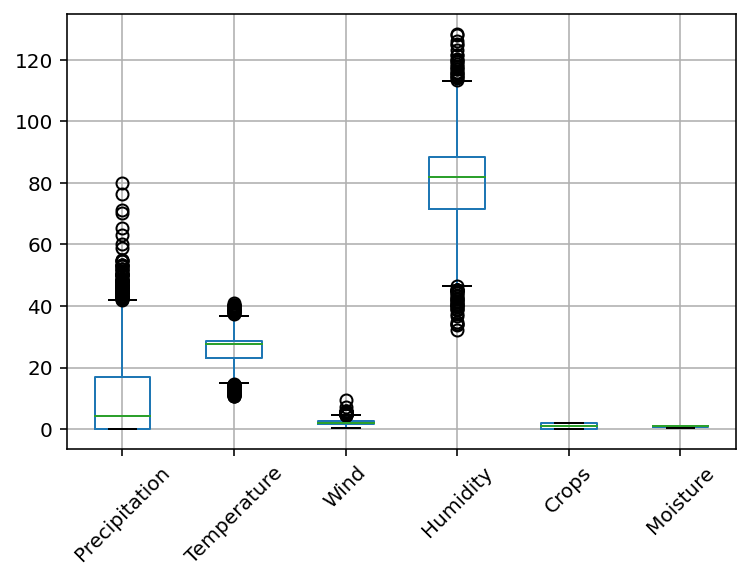

In [467]:
#Display outliers
df.boxplot(rot=45)

### Remove Missing Data and Outliers 

<AxesSubplot:>

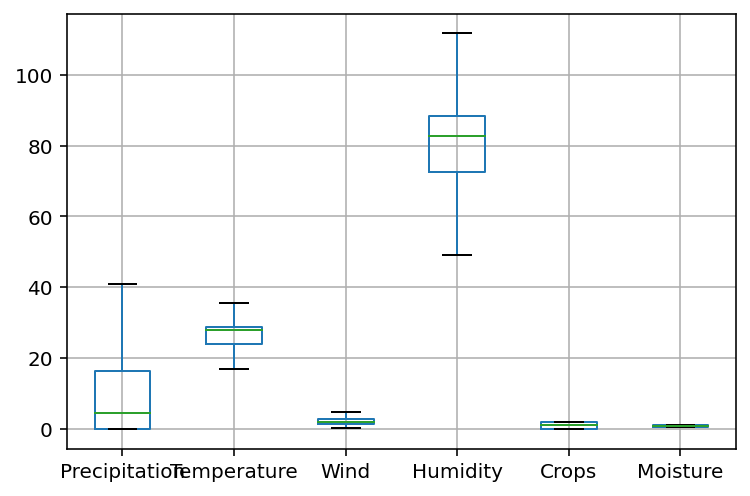

In [468]:
#missing data

# let's store the values missing in a variable
rows_to_fix_df = df[df.isna().any(axis=1)].copy()

#Remove missing values
filter_data = df.dropna()

#Remove outliers
columns=['Precipitation', 'Temperature', 'Wind', 'Humidity', 'Moisture']
def replace_outliers_IQR(filter_data, columns):
    for c in columns:
        q1=filter_data[c].quantile(0.25)
        q3=filter_data[c].quantile(0.75)
        iqr = q3-q1
        low_lim = q1 - 1.5*iqr
        high_lim = q3 + 1.5*iqr
        filter_data[c] = np.where(filter_data[c] >= high_lim, high_lim, np.where(filter_data[c] <= low_lim, low_lim, filter_data[c]))

ndf_c = filter_data.copy()        
replace_outliers_IQR(filter_data, columns)

# Display boxplot without outliers and missing data
filter_data.boxplot()

We have removed the missing data rows from our dataset. We have also removed the outliers. From the boxplot above, we can see that there are no more outliers in precipitation, temperature, wind, and humidity which was in the previous boxplot before removing the outliers. 

# Task 2 - Data scaling

 Choose at least 3 data scaling techniques and discuss why you are testing them. At least one
data scaling technique must change the attributes’ distribution.
 
 MinMaxScaler: Don't change the attributes’ distribution.
 MaxAbsScaler:Don't change the attributes’ distribution.
 RobustScaler:Don't change the attributes’ distribution.
 QuantileTransformer:change the attributes’ distribution. 
 Normalizer(Z-score Scaler):change the attributes’ distribution.
 Log Scaler:change the attributes’ distribution.
 
 It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution

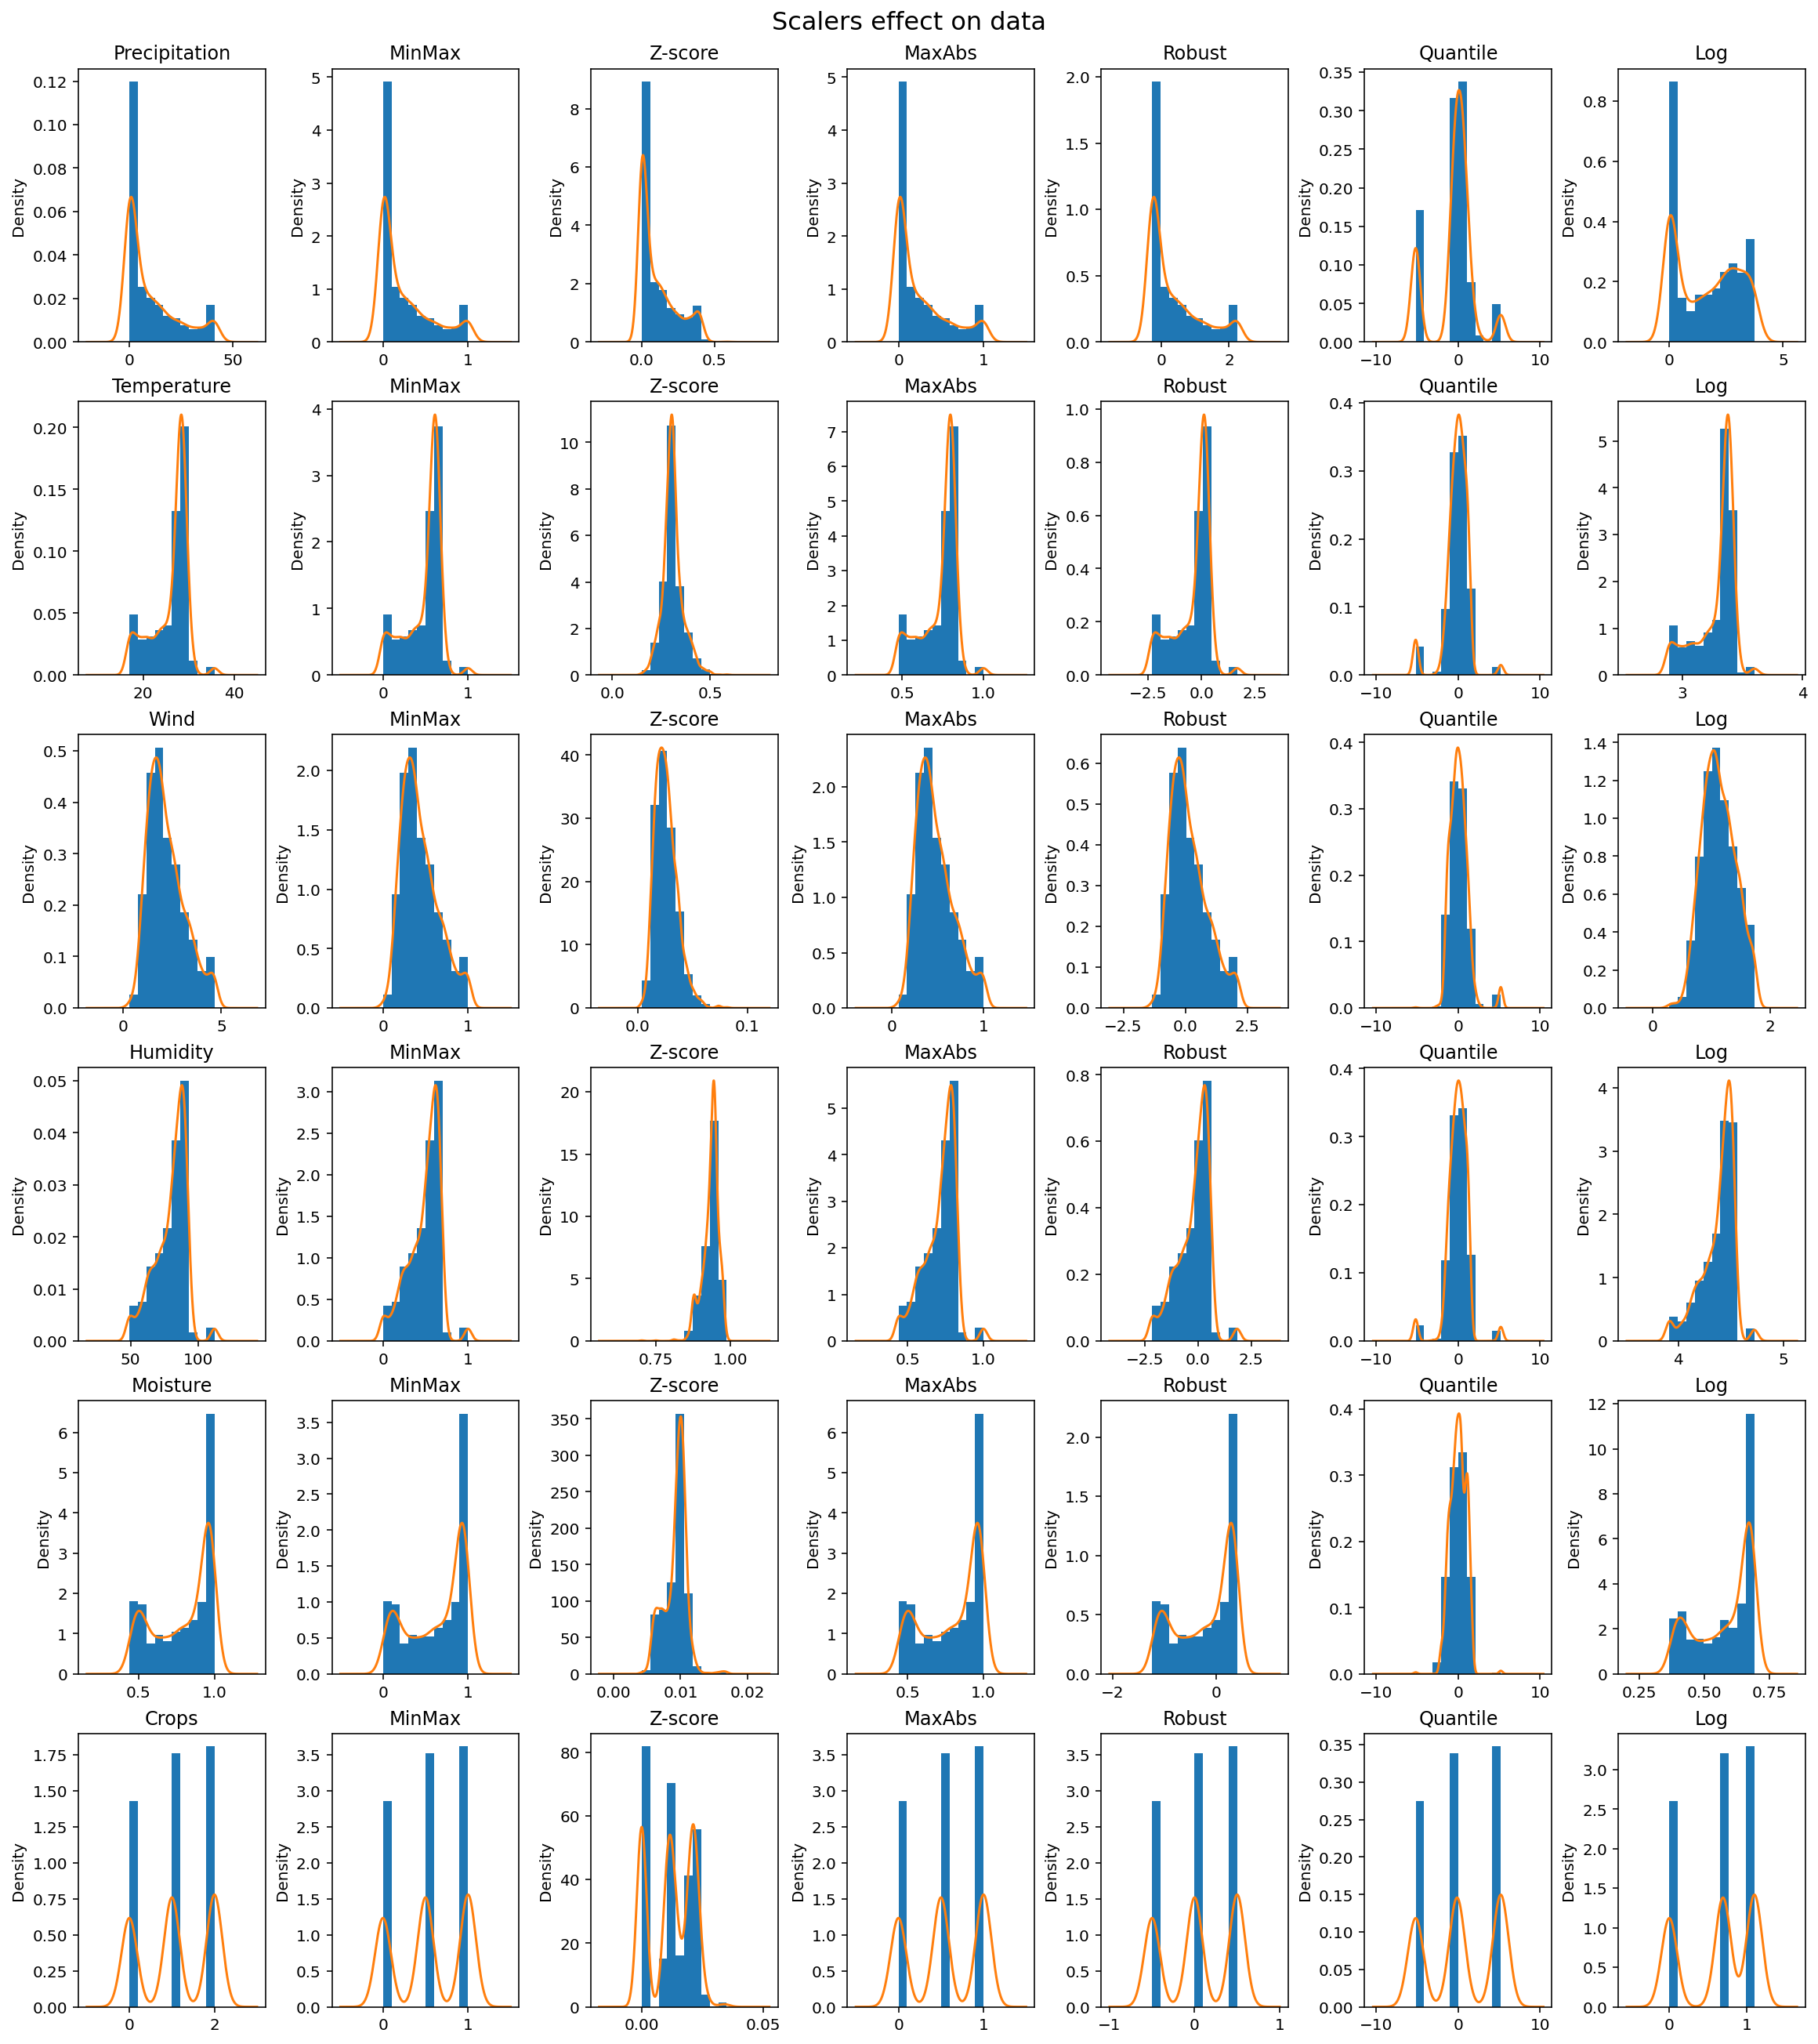

In [469]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Choose data scaling techniques
def plot_histograms_density_for_scalers(df, columns, fig_title, scalers, scaler_names):
    fig, axs = plt.subplots(len(columns),len(scalers)+1,figsize=(16,18),constrained_layout=True)
    fig.suptitle(fig_title, fontsize=16)
    axs = axs.flatten()
    i = 0 
    for c in columns:
        df[c].hist(ax=axs[i], density=True) # normalizes the density
        df[c].plot.density(ax=axs[i], title=c)
        i+=1
        for j in range(len(scalers)):
            df_transformed = scalers[j].fit_transform(df)
            df_transformed = pd.DataFrame(df_transformed, index=df.index, columns=df.columns)
            df_transformed[c].hist(ax=axs[i], density=True, stacked=True) # normalizes the density
            df_transformed[c].plot.density(ax=axs[i], title=scaler_names[j])
            i+=1
            
columns=['Precipitation', 'Temperature', 'Wind', 'Humidity', 'Moisture','Crops']
scaler_names = ['MinMax', 'Z-score', 'MaxAbs', 'Robust', 'Quantile', 'Log']
arr_scalers = [MinMaxScaler(), Normalizer(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal'),FunctionTransformer(np.log1p)]
plot_histograms_density_for_scalers(filter_data, columns, 'Scalers effect on data', arr_scalers, scaler_names)

### Discuss the Figures
Plot the result, side by side, of the original and the data scaling techniques. Discuss the figure.
 
We have choosen six data scaling techniques here such as MinMax, Z-score, MaxAbs, Robust Quantile, and Log.  

MinMax Scaler subtracts the minimum value in the feature and then divides by the range which is the difference between the original maximum and minimum. The shape of the original distribution is preserved by MinMaxScaler. It has no effect on the information embedded in the original data. MinMaxScaler doesn't lessen the significance of outliers. MinMaxScaler returns a feature with a default range of 0 to 1.

The number of standard deviations away from the mean is represented by the Z-score, which is a form of scaling. The z-score can be used to confirm that the feature distributions have mean = 0 and standard deviation = 1. It's handy when there are a few outliers but none that need to be clipped.

The MaxAbs value estimator scales and translates each feature independently so that each feature in the training set has a maximum absolute value of 1.0. It does not relocate or centre the data, therefore there is no loss of sparsity. This Scaler acts similarly to MinMaxScaler on positive-only data and, as a result, suffers from significant outliers.

RobustScaler divides the feature vector by the interquartile range (75% value — 25% value) after subtracting the median.
RobustScaler, unlike MinMaxScaler, does not scale the data into a specified interval. It fails to meet the stringent scale definition. When RobustScaler is applied, the range for each feature is larger than it was with MinMaxScaler.
To decrease the effects of outliers, we can use RobustScaler instead of MinMaxScaler.

The features are transformed into a uniform distribution via the quantile scaler. This transformation tends to spread out the most frequent values for a given characteristic. It also lessens the impact of outliers on the margins. Each aspect is subjected to the alteration in its own way. The boundaries of the output distribution will be translated to the features values of unseen data that fall below or above the fitted range. This is a non-linear transformation. It may cause linear correlations between variables recorded on the same scale to be distorted, but it makes variables measured on separate scales more directly comparable.

To compress a vast range into a tight range, log scaling computes the log of values. When a few values have a lot of points and the rest of the values have less points, log scaling is useful. Log scaling alters the distribution, which aids the performance of linear models.

In all 5 features Z-score, quantile, and log scaling techniques has changed the attributes distribution mostly. For precipitation, Z-score, quantile, and log scaling techniques changed the attributes' original distribution. For temperature also, Z-score, quantile, and log scaling techniques changed the attributes' original distribution. In wind, Z-score, quantile, and log scaling techniques changed the attributes' original distribution. For humidity also, Z-score, quantile, and log scaling techniques changed the attributes' original distribution. For moisture, Z-score, quantile, and log scaling techniques changed the attributes' original distribution.

# Part 3 – Handling missing data and outliers

Choose one technique provided by pandas for filling missing data (e.g., bfill, ffill, etc) and
fill the missing data. Plot the data and discuss potential problems with it.


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

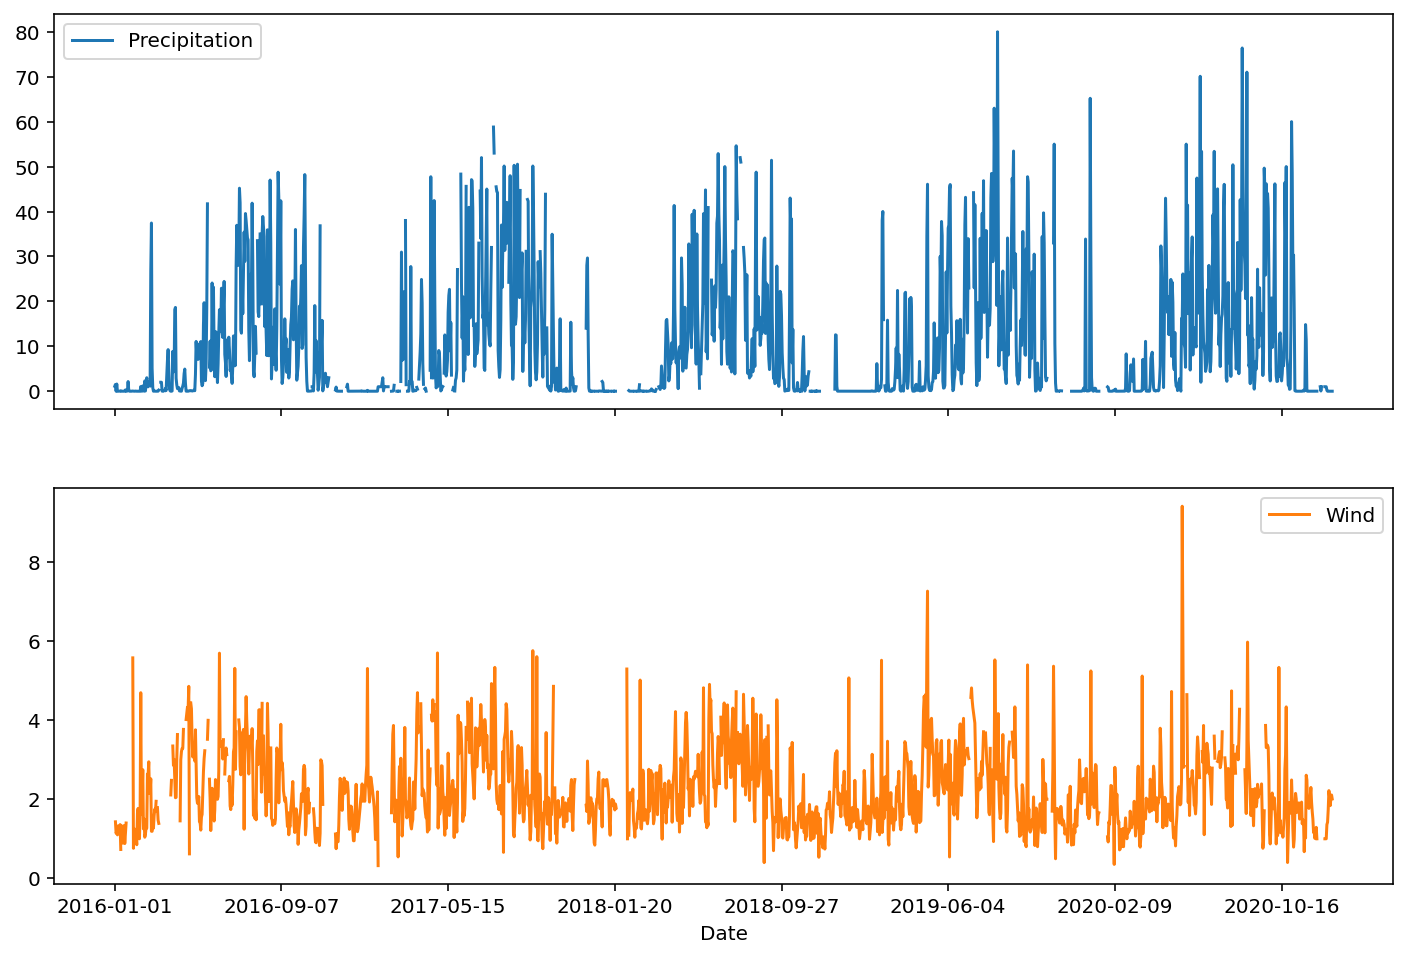

In [470]:
display(df[['Precipitation', 'Wind']].plot(
    subplots=True,
    figsize=(12,8)))

# display(df.describe())

<AxesSubplot:ylabel='Density'>

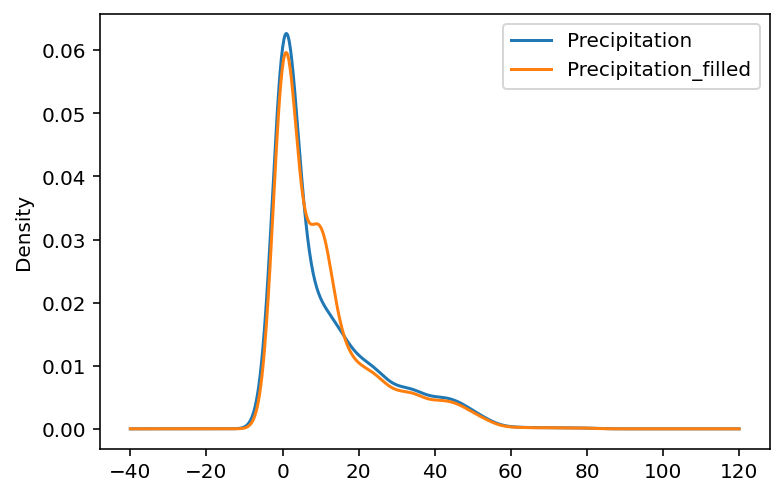

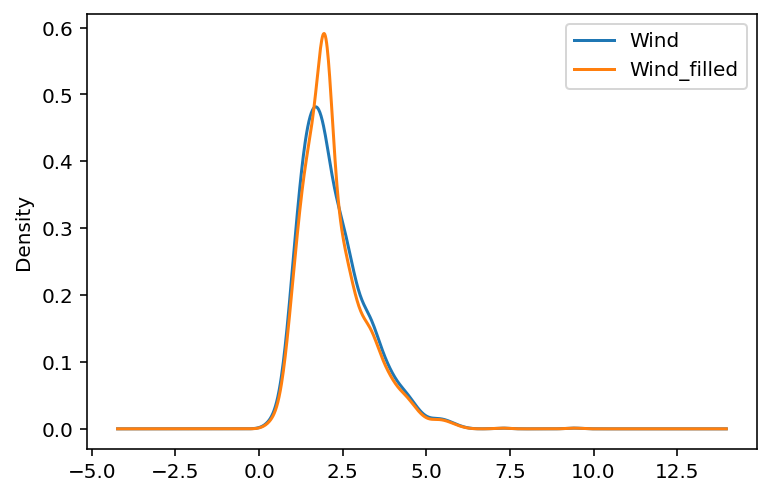

In [471]:
# Deal with missing data
# Use mean to fill missing data
df1=df.copy()
m = int(df1['Precipitation'].mean())
df1['Precipitation_filled'] = df1['Precipitation'].fillna(m)

n = int(df1['Wind'].mean())
df1['Wind_filled'] = df1['Wind'].fillna(n)

columns1=df1[['Precipitation', 'Precipitation_filled']]
columns2=df1[['Wind','Wind_filled']]

# display(df[['Precipitation', 'Wind']].plot(
#     subplots=True,
#     figsize=(12,8)))

columns1.plot.kde()
columns2.plot.kde()


Discuss potential problems with it: As you can see, the major difference between before and after filling missing data with means is that the data distribution will change in those attributes. Like above figure, the middle part changed a lot compared to both sides. 

In [472]:
display(df1.describe())

,Precipitation,Temperature,Wind,Humidity,Crops,Moisture,Precipitation_filled,Wind_filled
count,1642.000000,1827.000000,1641.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,10.773866,25.708071,2.236976,79.091142,1.007115,0.787219,10.695505,2.212850
std,14.030122,4.383733,0.998802,12.809595,0.816354,0.183842,13.302469,0.949276
min,0.000000,10.768576,0.321019,32.259415,0.000000,0.430000,0.000000,0.321019
25%,0.070000,23.015000,1.500000,71.570000,0.000000,0.620000,0.140000,1.570000
50%,4.300000,27.660000,2.010000,82.040000,1.000000,0.840000,6.230000,2.000000
75%,16.822500,28.560000,2.770000,88.280000,2.000000,0.960000,14.825000,2.670000
max,80.000000,40.934096,9.420000,128.440668,2.000000,1.000000,80.000000,9.420000


### Create models using the classifier and regressor
Using the two classifiers or regressors discussed in class (e.g., linear or KNN). Validate them and decide which one must be chosen. You must decide the best combination Classifier, Regressor + Data scaling technique. Discuss why you chose the combination. Don’t forget to justify which evaluation metric you will use to make such a decision.

In [473]:
filter_data
display(filter_data.describe())

,Precipitation,Temperature,Wind,Humidity,Crops,Moisture
count,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000
mean,10.171021,26.067502,2.207923,79.694756,1.075459,0.791594
std,12.615945,3.926619,0.929830,11.710979,0.801477,0.185879
min,0.000000,16.998750,0.321019,49.157500,0.000000,0.440000
25%,0.060000,23.977500,1.500000,72.602500,0.000000,0.620000
50%,4.350000,27.810000,2.010000,82.860000,1.000000,0.860000
75%,16.452500,28.630000,2.760000,88.232500,2.000000,0.960000
max,41.041250,35.608750,4.650000,111.677500,2.000000,1.000000


,New_Colums,accuracy_score,f1_score
0,KNN-MinMax,0.868852,0.867853
1,KNN-Z-score,0.696721,0.692980
2,KNN-MaxAbs,0.860656,0.858799
3,KNN-Robust,0.841530,0.840066
4,KNN-Quantile,0.800546,0.798481
5,Linear-MinMax,0.822404,0.816860
6,Linear-Z-score,0.642077,0.629950
7,Linear-MaxAbs,0.852459,0.851243
8,Linear-Robust,0.857923,0.855926
9,Linear-Quantile,0.797814,0.795325


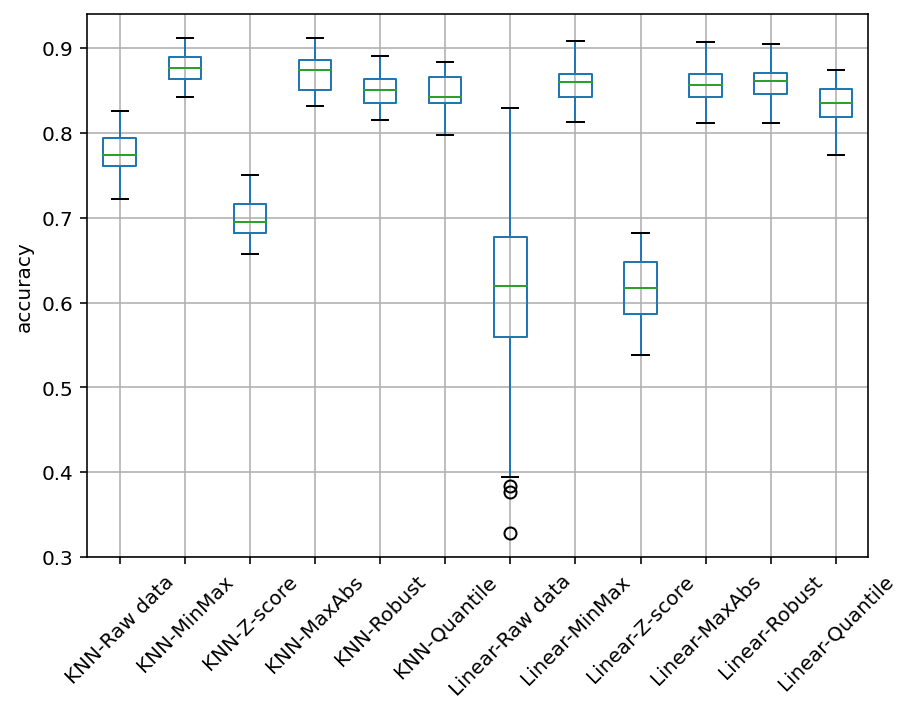

In [474]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

fig, axs = plt.subplots(1, 1,figsize=(7,5))
d = {'New_Colums':[],'accuracy_score': [], 'f1_score': []}

def plot_classifiers(df, scalers, names, classifiers):
    results = pd.DataFrame()
    for j in range (len(classifiers)):
        cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
        scores = cross_val_score(classifiers[j], X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
        if j == 1:
            results['Linear-'+'Raw data'] = [abs(elem) for elem in scores]
        else:
            results['KNN-'+'Raw data'] = [abs(elem) for elem in scores]
        for i in range (len(scalers)):
            # X is all the other variables
            # fit and transform the data
            X_t = arr_scalers[i].fit_transform(X_train)
            X_test_scaled = arr_scalers[i].transform(X_test)
             # Use model to train data
            classifiers[j].fit(X_t, y_train)
            # Use test data to get predict values
            y_pred = classifiers[j].predict(X_test_scaled)
    
            # Let's estimate the values for several rounds of crossvalidation
            cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
            scores = cross_val_score(classifiers[j], X_t, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
            ac=accuracy_score(y_pred, y_test)
            f1=f1_score(y_test, y_pred, average="weighted")
            d['accuracy_score'].append(ac)
            d['f1_score'].append(f1)
            
            if j==1:
                d['New_Colums'].append(f'Linear-{names[i]}')
                results['Linear-'+names[i]] = [abs(elem) for elem in scores]
            else:
                d['New_Colums'].append(f'KNN-{names[i]}')
                results['KNN-'+names[i]] = [abs(elem) for elem in scores]

    df_res = results
    df_res.boxplot(ax=axs) 
    axs.set_xticklabels(df_res.columns, rotation=45)
    axs.set_ylabel('accuracy')
  
scaler_names = ['MinMax', 'Z-score', 'MaxAbs', 'Robust', 'Quantile']
arr_scalers = [MinMaxScaler(), Normalizer(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')]
classifiers = [KNeighborsClassifier(n_neighbors=7), SGDClassifier()]
plot_classifiers(filter_data, arr_scalers, scaler_names, classifiers)

score_df = pd.DataFrame(data=d)
score_df

We have used KNN and Linear classifiers here. Based on the Accuracy evaluation matrics, we have decided to proceed with KNN Classifier. KNN classifier usually work slower with large amount of data and computational cost is higher whereas Linear classifier works better and faster with single classification. 

And We have decided to use MinMax data scaling technique with KNN classifier since form the plot above we can see that MinMax provides better result than other data scaling techniques. 

### Fill Missing Data

Fill the missing data and the outliers using the decided Classifier, Regressor + Data scaling technique. Make sure the rows are properly scaled before you forecast the values

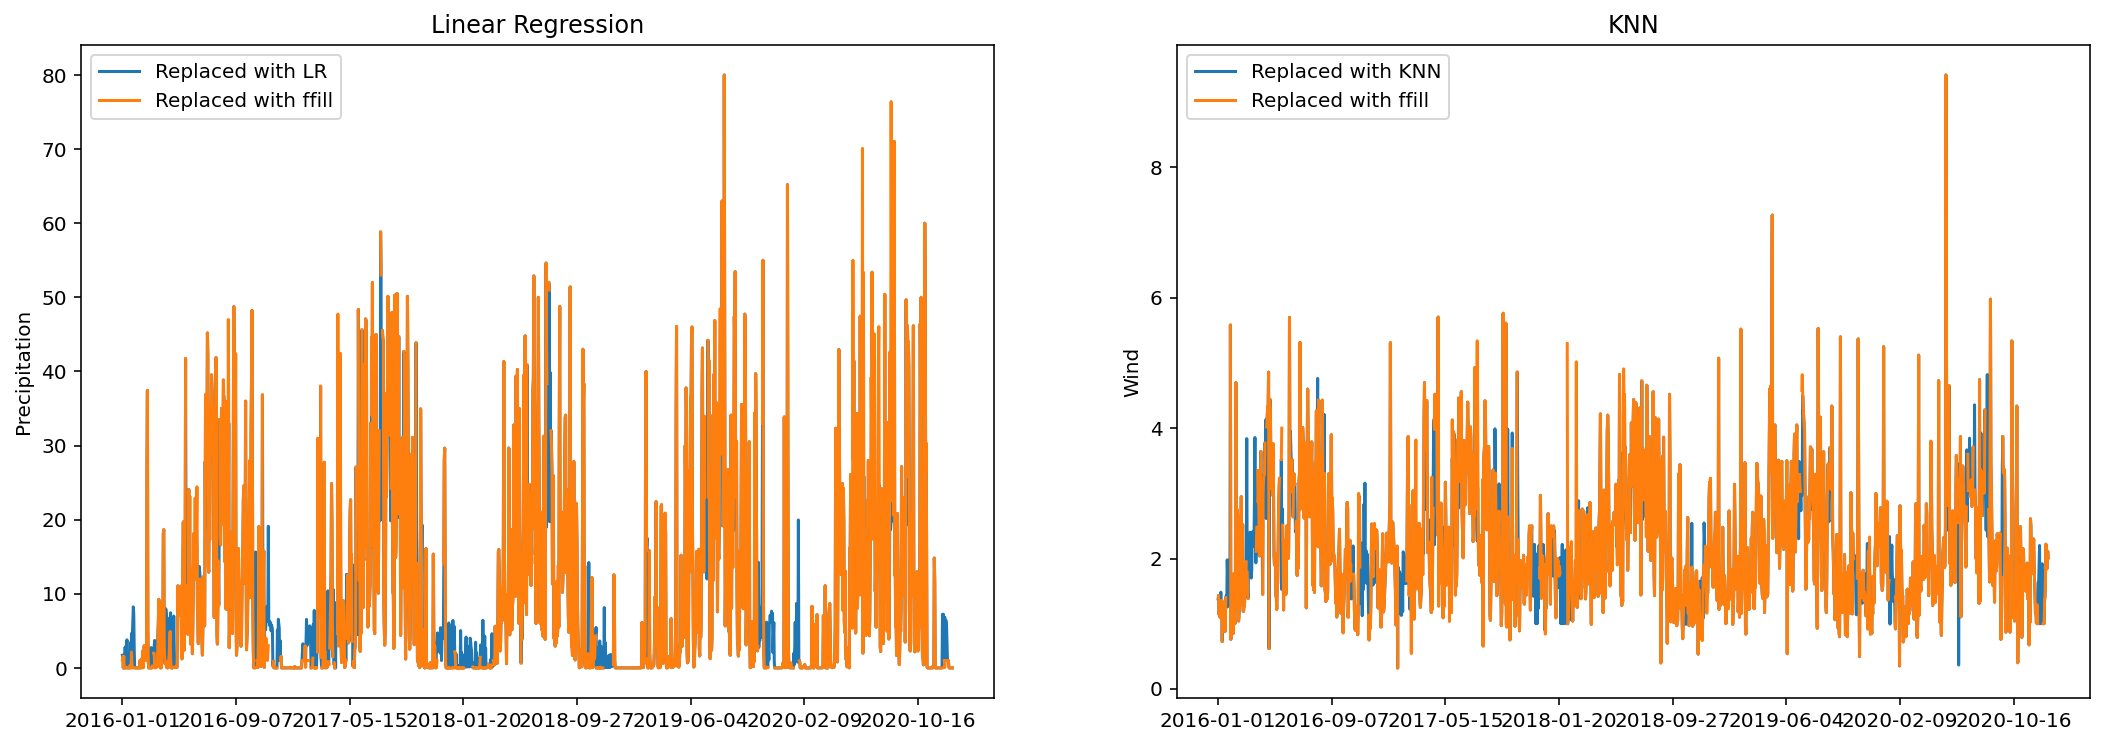

In [475]:
import warnings
warnings.filterwarnings("ignore")

# print(df.describe())
# let's remove all the rows we need to fix and store to use later
rows_to_fix_reg = df[df.isna().any(axis=1)]
df.sort_index(inplace=True)

# Linear Model
clean_df_reg_lr = df.dropna()
rows_to_fix_reg_lr = rows_to_fix_reg.copy()

# Let's prepare the data for our model
# Remember that the linear model was invariant to the scaling
X = clean_df_reg_lr.drop(['Precipitation','Wind'], axis=1).to_numpy()
y = clean_df_reg_lr['Precipitation'].to_numpy()
model = LinearRegression()
model.fit(X, y)
# Now let's predict the missing rows
X_to_pred = rows_to_fix_reg_lr.drop(['Precipitation','Wind'], axis=1).to_numpy()

y_pred_lr = model.predict(X_to_pred)
# let's add the data to the NaN rows
rows_to_fix_reg_lr['Precipitation'] = y_pred_lr
rows_to_fix_reg_lr['Precipitation']=rows_to_fix_reg_lr['Precipitation'].abs()

# print(rows_to_fix_reg_lr)
# put rows back
df_lr = clean_df_reg_lr.append(rows_to_fix_reg_lr)
df_lr.sort_index(inplace=True)

# # KNN
clean_df_reg_knn = df.dropna()
rows_to_fix_reg_knn = rows_to_fix_reg.copy()

# The best for KNN was the MinMax scaler

X = clean_df_reg_knn.drop(['Precipitation','Wind'], axis=1).to_numpy()
z_score = Normalizer()
X_t = z_score.fit_transform(X)
y = clean_df_reg_knn['Wind'].to_numpy()
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_t, y)
# Now let's use the model to predict the missing rows
X_to_pred = rows_to_fix_reg_knn.drop(['Precipitation','Wind'], axis=1).to_numpy()
# we need to transform the data in X_to_pred (do not fit, otherwise the scaler will change the ranges)
X_t_to_pred = z_score.transform(X_to_pred)

y_pred_knn = model.predict(X_t_to_pred)

# Let's add to the NaN rows the values predicted
rows_to_fix_reg_knn['Wind'] = y_pred_knn

# put rows back
df_knn = clean_df_reg_knn.append(rows_to_fix_reg_knn)
df_knn.sort_index(inplace=True)

# Create the plots
fig, axs = plt.subplots(1,2,figsize=(18,6))
axs = axs.flatten()
# df['Precipitation'] = df['Precipitation'].fillna(method='ffill')
df_lr['Precipitation'].plot(ax=axs[0], xlabel='', ylabel='Precipitation')
df['Precipitation'].plot(ax=axs[0], title='Linear Regression', xlabel='', legend=True)
axs[0].legend(["Replaced with LR", "Replaced with ffill"])

# df['Wind'] = df['Wind'].fillna(method='ffill')
df_knn['Wind'].plot(ax=axs[1], xlabel='', ylabel='Wind')
df['Wind'].plot(ax=axs[1], title='KNN', xlabel='', legend=True)
axs[1].legend(["Replaced with KNN", "Replaced with ffill"]);

#fill all missing data by filling predicated data
rows_to_fix_reg['Precipitation']=y_pred_lr
rows_to_fix_reg['Wind']=y_pred_knn
rows_to_fix_reg['Precipitation']=rows_to_fix_reg['Precipitation'].abs()
df=clean_df_reg_knn.append(rows_to_fix_reg)


# Part 4 – Feature selection 

We have decided to go with feature selction problem.

### Define Target Value
Our target value crops is categorical value and hence we will perform classification. 

In [476]:
X= df.drop(['Crops'], axis=1).copy()
y= df['Crops']
print(y.describe())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)


count    1827.000000
mean        1.007115
std         0.816354
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Crops, dtype: float64


### Define as baseline model

count    1827.000000
mean        1.007115
std         0.816354
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Crops, dtype: float64


,New_Colums,accuracy_score,f1_score
0,KNN-MinMax,0.868852,0.867853


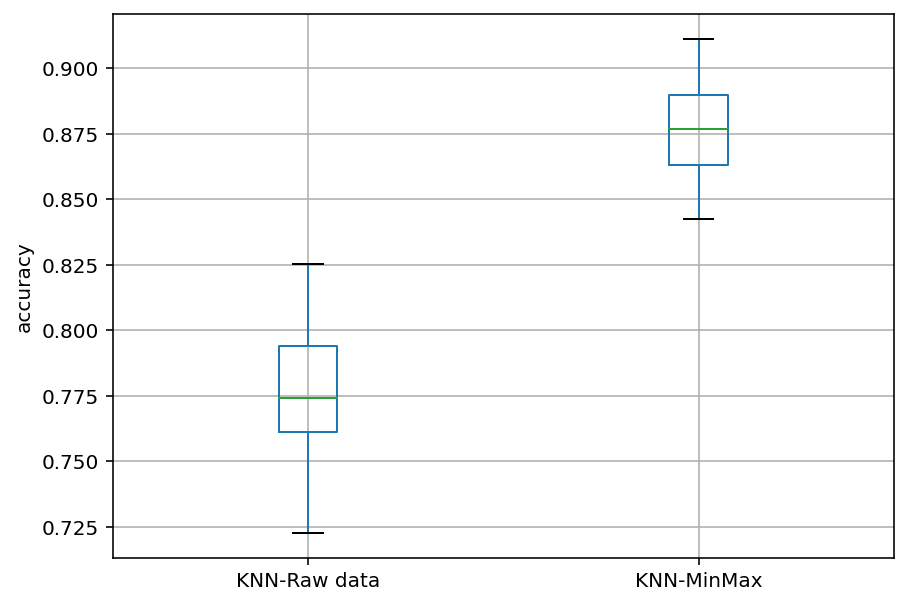

In [477]:
X= df.drop(['Crops'], axis=1).copy()
y= df['Crops']
print(y.describe())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

fig, axs = plt.subplots(1, 1,figsize=(7,5))
d = {'New_Colums':[],'accuracy_score': [], 'f1_score': []}

def plot_classifiers(df, scalers, names, classifiers):
    results = pd.DataFrame()
    for j in range (len(classifiers)):
        cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
        scores = cross_val_score(classifiers[j], X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
        results['KNN-'+'Raw data'] = [abs(elem) for elem in scores]
        for i in range (len(scalers)):
            # X is all the other variables
            # fit and transform the data
            X_t = arr_scalers[i].fit_transform(X_train)
            X_test_scaled = arr_scalers[i].transform(X_test)
             # Use model to train data
            classifiers[j].fit(X_t, y_train)
            # Use test data to get predict values
            y_pred = classifiers[j].predict(X_test_scaled)
    
            # Let's estimate the values for several rounds of crossvalidation
            cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
            scores = cross_val_score(classifiers[j], X_t, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
            ac=accuracy_score(y_pred, y_test)
            f1=f1_score(y_test, y_pred, average="weighted")
            d['accuracy_score'].append(ac)
            d['f1_score'].append(f1)
            d['New_Colums'].append(f'KNN-{names[i]}')
            results['KNN-'+names[i]] = [abs(elem) for elem in scores]

    df_res = results
    df_res.boxplot(ax=axs) 
    axs.set_xticklabels(df_res.columns)
    axs.set_ylabel('accuracy')
  
scaler_names = ['MinMax']
arr_scalers = [MinMaxScaler()]
classifiers = [KNeighborsClassifier(n_neighbors=7)]
plot_classifiers(df, arr_scalers, scaler_names, classifiers)

score_df = pd.DataFrame(data=d)
score_df

### Select two feature selection techniques
Select two feature selection techniques and justify why you chose them.

In our dataset all of our independent features has numerical values and target output have categorical values. When the goal variable is categorical, the ANOVA f-test and the mutual information test are the two most widely used feature selection methods for numerical input data.

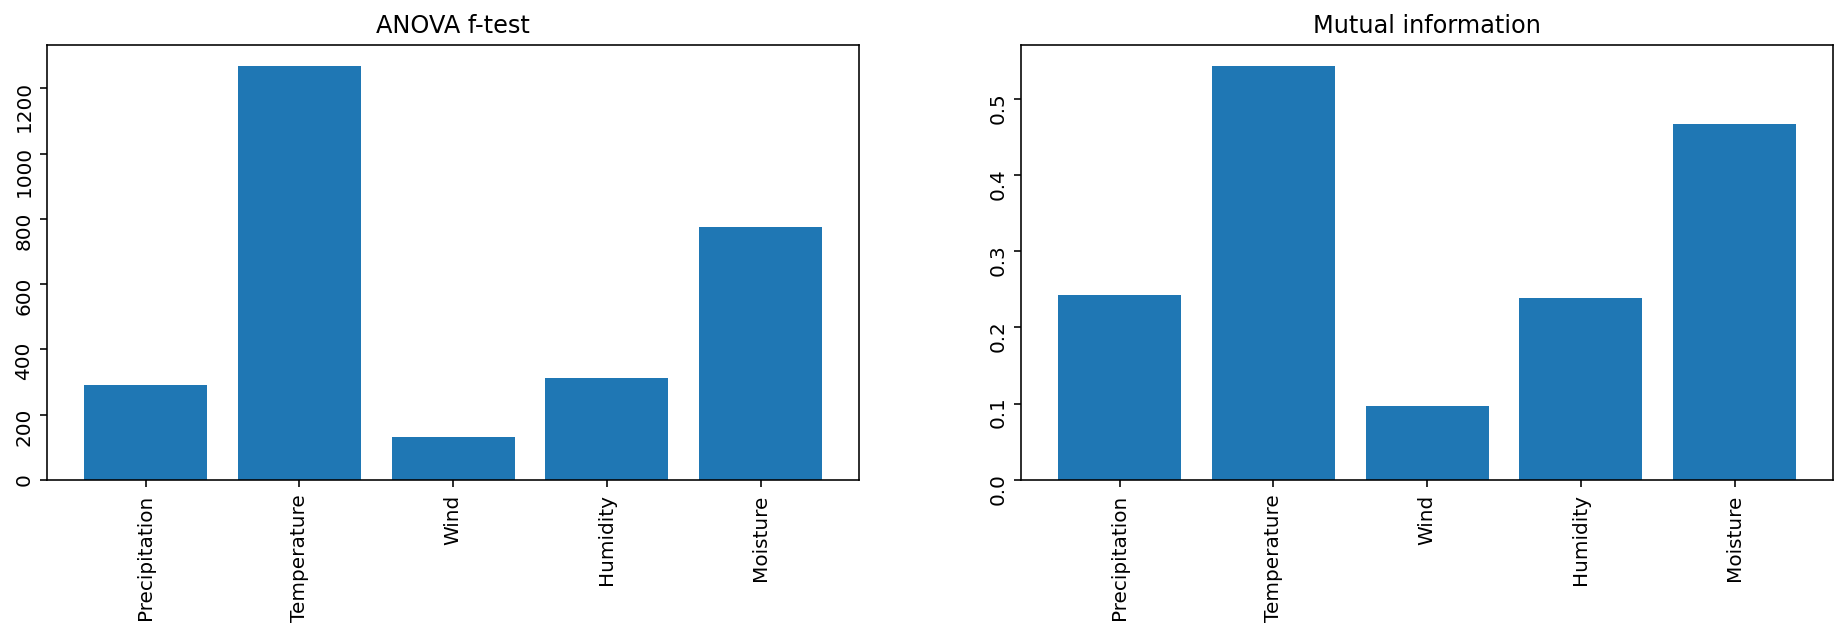

In [478]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

cols = X.columns

# feature selection
def select_features(X, y, score_function):
    # configure to select all features
    sel = SelectKBest(score_func=score_function, k='all')
    # learn relationship from training data
    sel.fit(X, y)
    return sel
 
# feature selection
fs = select_features(X, y, f_classif)
mi = select_features(X, y, mutual_info_classif)
# plot the scores
fig, axs = plt.subplots(1, 2, figsize=(16,4))
axs = axs.flatten()
axs[0].bar(cols, fs.scores_)
axs[0].tick_params(labelrotation=90)
axs[0].set_title('ANOVA f-test')
axs[1].bar(cols, mi.scores_)
axs[1].tick_params(labelrotation=90)
axs[1].set_title('Mutual information')
pyplot.show()

# Define as baseline model using all features
Define as baseline model using all features and store its performance. You must consider
 using a repeated cross-validation to generate several estimates. You may want to choose as
 your selected model the one with best performance in Part 3.

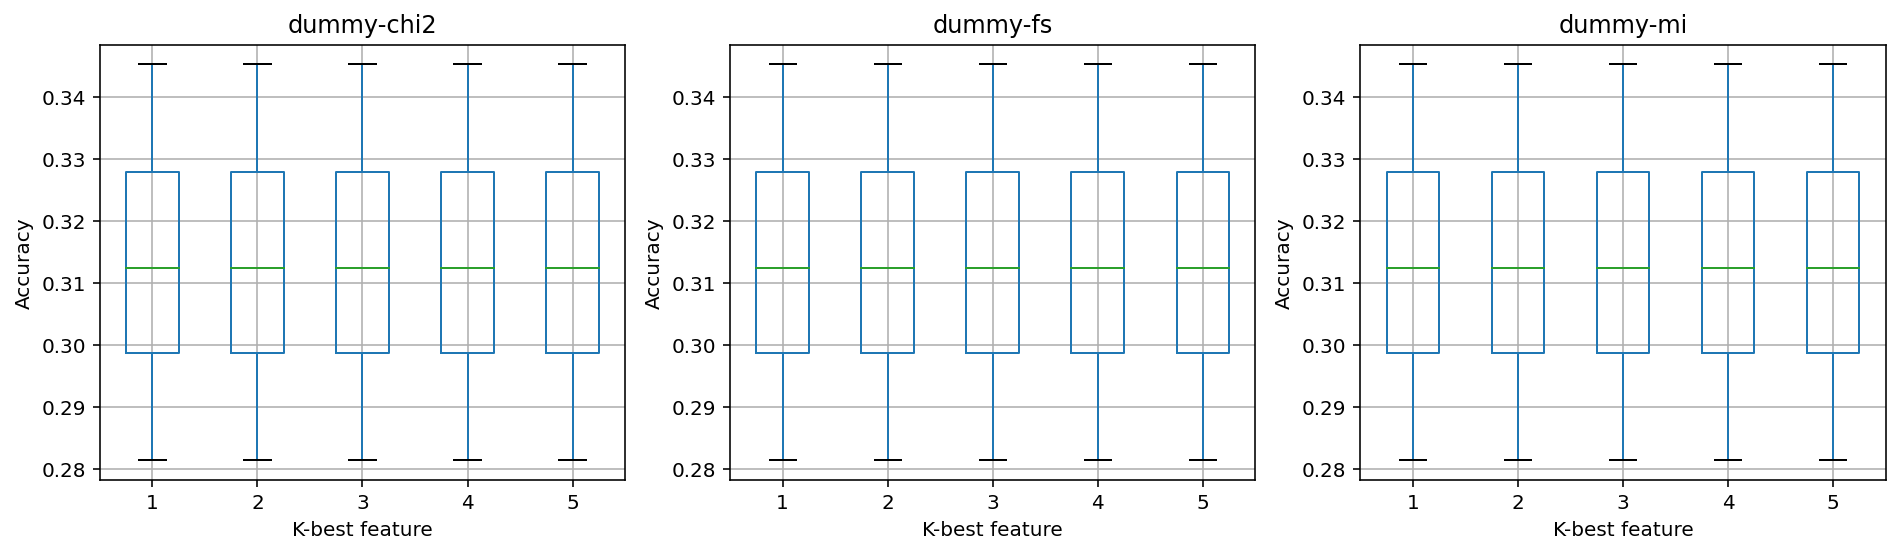

In [479]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,f_classif,chi2,mutual_info_classif
from sklearn.dummy import DummyClassifier

sel = SelectKBest()
scaler = MinMaxScaler() # only for svm classification
dummy=DummyClassifier(strategy="most_frequent")
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=321)

# You must write your code starting from here
models = [dummy]
models_names = ['dummy']
score_f = [chi2, f_classif, mutual_info_classif]
score_name = ['chi2', 'fs', 'mi']
fig, axs = plt.subplots(1, 3, figsize=(16,4))
axs = axs.flatten()
fig_idx = 0
for j in range(len(models)):
    results = {}
    for m in range(len(score_f)):
        for i in range(len(k_best)):
            # learn relationship from training data
            X_sel=SelectKBest(score_f[m], k='all').fit_transform(X,np.ravel(y))
            scores = cross_val_score(models[j], X_sel, y, scoring='accuracy', cv=cv, n_jobs=-1)
            results[f'{k_best[i]}'] = scores
        df_res = pd.DataFrame(results).copy()
        df_res.boxplot(ax=axs[fig_idx])
        axs[fig_idx].set_title(f"{models_names[j]}-{score_name[m]}");
        axs[fig_idx].set_ylabel("Accuracy")
        axs[fig_idx].set_xlabel("K-best feature")
        fig_idx+=1
plt.show()


### Apply the feature selection techniques

Apply the feature selection techniques and compare their performance with the baseline.
Are there improvements? Yes, no, why? Try to discuss your outcomes.

Now we use three feature selection techniques:chi2, f_classif and mutual_info_classif

Yes, Compare their performance with the baseline.There are improvements
Because compare SVC to dummy techniques, we can see, svc's Accurancy is higher than dummy's Accurancy. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,f_classif,chi2,mutual_info_classif
from sklearn.dummy import DummyClassifier

sel = SelectKBest()
scaler = MinMaxScaler() # only for svm classification
rfc = RandomForestClassifier()
svc = SVC(kernel="linear")
dummy=DummyClassifier(strategy="most_frequent")
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=321)

k_best = [1, 2, 3, 4, 5]

# You must write your code starting from here
models = [rfc, svc, dummy]
models_names = ['rfc','svc','dummy']
score_f = [chi2, f_classif, mutual_info_classif]
score_name = ['chi2', 'fs', 'mi']
fig, axs = plt.subplots(3, 3, figsize=(16,16))
axs = axs.flatten()
fig_idx = 0
for j in range(len(models)):
    results = {}
    for m in range(len(score_f)):
        for i in range(len(k_best)):
            # learn relationship from training data
            X_sel=SelectKBest(score_f[m], k=k_best[i]).fit_transform(X,np.ravel(y))
            scores = cross_val_score(models[j], X_sel, y, scoring='accuracy', cv=cv, n_jobs=-1)
            results[f'{k_best[i]}'] = scores
        df_res = pd.DataFrame(results).copy()
        df_res.boxplot(ax=axs[fig_idx])
        axs[fig_idx].set_title(f"{models_names[j]}-{score_name[m]}");
        axs[fig_idx].set_ylabel("Accuracy")
        axs[fig_idx].set_xlabel("K-best feature")
        fig_idx+=1
plt.show()
